In [1]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'dlib'

In [ ]:
# Displayinh the number of GPUs available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

In [42]:
def detect_blink(eye_img):
    pred_B = model_b.predict(eye_img, verbose = 0)
    status = pred_B[0][0]
    status = status*100
    status = round(status,3)
    return  status

   
def crop_eye(img, eye_points):
    x1, y1 = np.amin(eye_points, axis=0)
    x2, y2 = np.amax(eye_points, axis=0)
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

    w = (x2 - x1) * 1.2
    h = w * IMG_SIZE[1] / IMG_SIZE[0]

    margin_x, margin_y = w / 2, h / 2

    min_x, min_y = int(cx - margin_x), int(cy - margin_y)
    max_x, max_y = int(cx + margin_x), int(cy + margin_y)

    eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(int)

    eye_img = img[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]]

    return eye_img, eye_rect

def get_eyes(shape):
    (leftEyeStart, leftEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rightEyeStart, rightEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    left_eye = shape[leftEyeStart:leftEyeEnd]
    right_eye = shape[rightEyeStart:rightEyeEnd]
    
    return left_eye, right_eye

def eye_aspect_ratio(eye):
    p2_minus_p6 = dist.euclidean(eye[1], eye[5])
    p3_minus_p5 = dist.euclidean(eye[2], eye[4])
    p1_minus_p4 = dist.euclidean(eye[0], eye[3])
    ear = (p2_minus_p6 + p3_minus_p5) / (2.0 * p1_minus_p4)
    return ear

# load a test image, resize it, and convert it to grayscale
def load_image(path, show=False, gray_show=False):
    test_image = cv2.imread(path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    test_image = imutils.resize(test_image, width=500)
    gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    
    if show:
        plt.imshow(test_image)
        plt.show()
        if gray_show:
            plt.imshow(gray, cmap='gray')
            plt.show()
    return test_image, gray

def detect_faces(face_detector, gray, scale_factor, frame_num, show_multi_faces = False):
     # detect faces in the grayscale image
    if face_detector == 'dlib':
        rects = detector(gray, 1)
        if len(rects) == 0:
            print('No face detected', frame_num)
            return False
        elif len(rects) > 1:
            print('more faces detected')
            return False
    elif face_detector == 'haar':
        detections = haar_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=5, minSize=(150, 150), flags=cv2.CASCADE_SCALE_IMAGE)
        #Checking if there are more than 1 detected faces
        if len(detections) > 1:
            print('multiple faces', frame_num)
            # The predicted faces are boxes (same width and height). The last two values correspond to these.
            # So by just checking which is higher, I can find the correct face
            if detections[0][2] > detections[1][2]:
                face = detections[0]
                other = detections[1]
            else:
                face = detections[1]
                other = detections[0]
            if show_multi_faces:
                print('largest and chosen face')
                fX, fY, fW, fH = face[0],face[1], face[2], face[3]
                plt.imshow(gray[fY:fY + fH, fX:fX + fW], cmap='gray')
                plt.show()
                print('not chosen face')
                fX, fY, fW, fH = other[0], other[1], other[2], other[3]
                plt.imshow(gray[fY:fY + fH, fX:fX + fW], cmap='gray')
                plt.show()
        elif len(detections) == 1:
            face = detections[0]
        # if no face detected
        elif len(detections) == 0:
            print('No face detected', frame_num)
            return False
        fX, fY, fW, fH = face[0],face[1], face[2], face[3]    
        rects = [dlib.rectangle(fX, fY, fX + fW, fY + fH)]
    return rects

def get_landmarks(img, gray, rects, show=False):
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        if show: 
            # convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
            (x, y, w, h) = face_utils.rect_to_bb(rect)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
            for (x, y) in shape:
                cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
    if show:     
        # show the output image with the face detections + facial landmarks
        plt.imshow(img)
        plt.show()
    return shape

Frame: 292


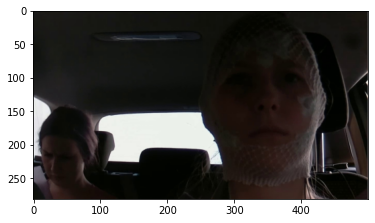

Frame: 293


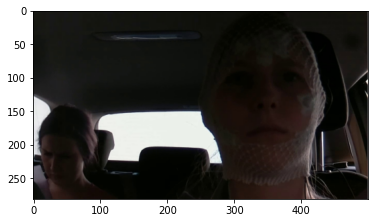

Frame: 294


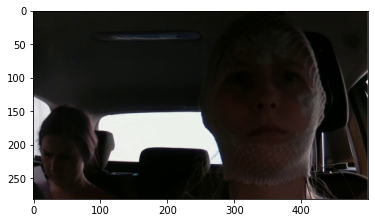

Frame: 295


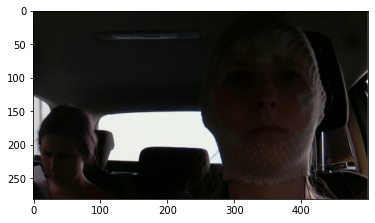

Frame: 296


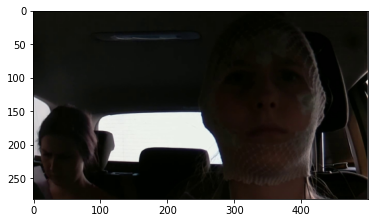

Frame: 297


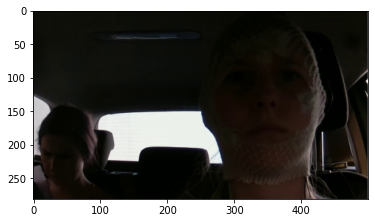

Frame: 298


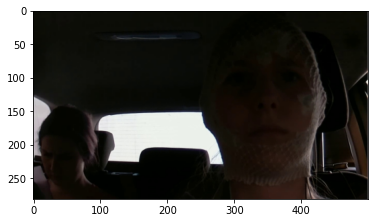

Frame: 299


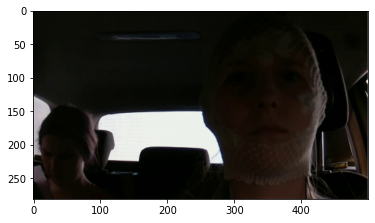

Frame: 300


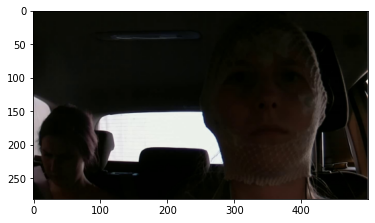

Frame: 301


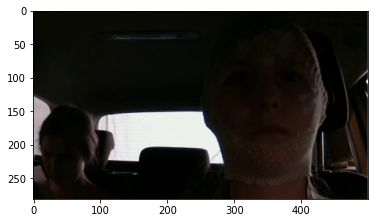

Frame: 302


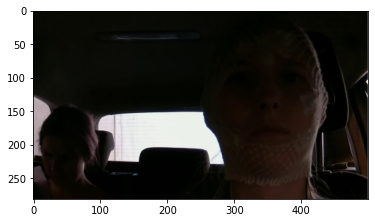

Frame: 303


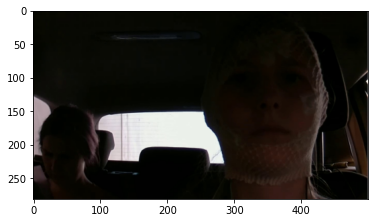

Frame: 304


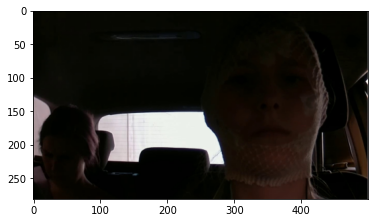

Frame: 305


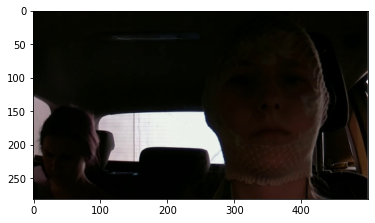

Frame: 306


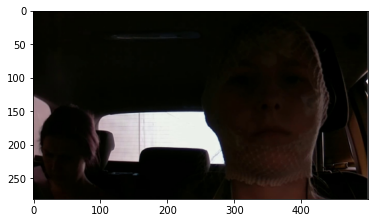

Frame: 307


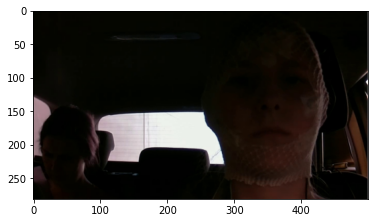

Frame: 308


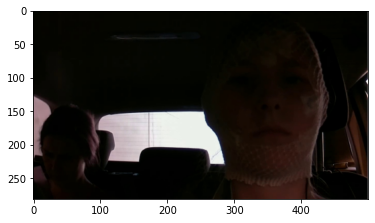

Frame: 309


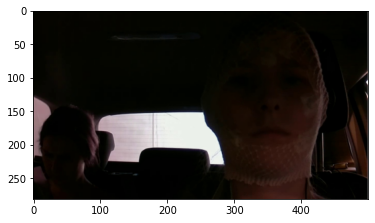

Frame: 310


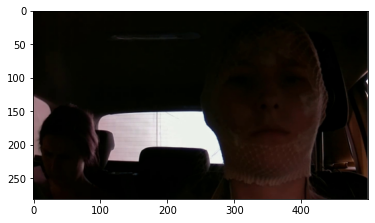

Frame: 311


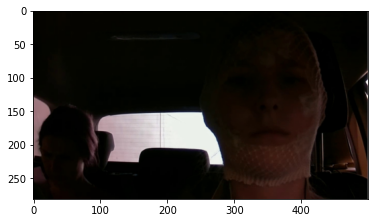

Frame: 312


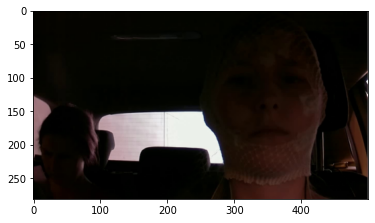

Frame: 313


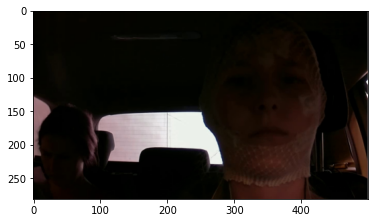

In [49]:
frame_start = 292
frame_end = 313

frames = range(frame_start, frame_end + 1)

# Just plotting sequence of frames
def plot_frames(frames):
    for frame in frames:
        path = '../frames/P11406/normal/frame' + str(frame) + '.jpg'
        print("Frame: " + str(frame))
        test_img, gray = load_image(path, show=True, gray_show=False)
        
plot_frames(frames)

In [44]:
IMG_SIZE = (1296,730)
B_SIZE = (34, 26)

#path = '../test_frames/frame848.jpg'

# haar Cascade path
cascade_path = '../models/haarcascade_frontalface_default.xml'
# create haar cascade
haar_cascade = cv2.CascadeClassifier(cascade_path)

# define pre-trained landmark detector path
ld_path = '../models/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(ld_path)
detector = dlib.get_frontal_face_detector()

model_b = load_model('../models/blinkdetection.h5')

face_detector = 'haar'

In [50]:
frame_start = 0
frame_end = 131000  # normal sleep test: last frame is 2804    restricted sleep test: last frame is 2774 
                # normal 1 hour: last frame is 165829      
frames = range(frame_start, frame_end + 1)

scale_factor = 1.010

folder_path = '../frames/P11406/normal/frame'

# which eye openness calculation method to use: cnn or ear
eo_method = 'cnn'

def calculate_eye_openness(frames, folder_path, scale_factor, eo_method):
    status_rates = []
    wrong_frames = []
    no_face_count = 0
    for frame in frames:
        if frame % 1000 == 0:
            print(frame)
        if frame == 60000:
            np.save('status_rates_subject6_normal_temp.npy', status_rates)
            np.save('wrong_frames_subject6_normal_temp.npy', wrong_frames)
        path = folder_path + str(frame) + '.jpg'
        test_img, gray = load_image(path, show=False)
        rects = detect_faces(face_detector, gray, scale_factor, frame, show_multi_faces = False)
    
        if rects == False:
            no_face_count += 1
            # append eye opennes status from previous frame
            status_rates.append(status)
            wrong_frames.append(frame)
            continue
            
        shapes = get_landmarks(test_img, gray, rects, show=False)
        
        if eo_method == 'cnn':
            #~~~~~~~~~~~~~~~~~56,64 EYE IMAGE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            eye_img_l, eye_rect_l = crop_eye(gray, eye_points=shapes[36:42])
            eye_img_r, eye_rect_r = crop_eye(gray, eye_points=shapes[42:48])
            #~~~~~~~~~~~~~~~~~FOR THE BLINK DETECTION~~~~~~~~~~~~~~~~~~~~~~~
            eye_blink_left = cv2.resize(eye_img_l.copy(), B_SIZE)
            eye_blink_right = cv2.resize(eye_img_r.copy(), B_SIZE)
            eye_blink_left_i = eye_blink_left.reshape((1, B_SIZE[1], B_SIZE[0], 1)).astype(np.float32) / 255.
            eye_blink_right_i = eye_blink_right.reshape((1, B_SIZE[1], B_SIZE[0], 1)).astype(np.float32) / 255.

            status = detect_blink(eye_blink_left_i)
            # status_r = detect_blink(eye_blink_right_i)

            # status = (status_l + status_r) / 2
        
        elif eo_method == 'ear':
            left_eye, right_eye = get_eyes(shapes)
            left_ear = eye_aspect_ratio(left_eye)
            right_ear = eye_aspect_ratio(right_eye)
            
            status = (left_ear + right_ear) / 2
        
        status_rates.append(status)

    print(no_face_count)
    return status_rates, wrong_frames

status_rates, wrong_frames = calculate_eye_openness(frames, folder_path, scale_factor, eo_method)
np.save('status_rates_subject6_normal.npy', status_rates)
np.save('wrong_frames_subject6_normal.npy', wrong_frames)

0
No face detected 292
No face detected 293
No face detected 294
No face detected 295
No face detected 296
No face detected 297
No face detected 298
No face detected 299
No face detected 300
No face detected 301
No face detected 302
No face detected 303
No face detected 304
No face detected 305
No face detected 306
No face detected 307
No face detected 308
No face detected 309
No face detected 310
No face detected 311
No face detected 312
No face detected 313
No face detected 963
No face detected 964
No face detected 965
No face detected 966
No face detected 967
1000
No face detected 1198
No face detected 1199
No face detected 1200
No face detected 1201
No face detected 1204
No face detected 1206
No face detected 1207
No face detected 1208
No face detected 1214
No face detected 1220
No face detected 1221
No face detected 1222
No face detected 1223
No face detected 1224
No face detected 1225
No face detected 1226
No face detected 1227
No face detected 1228
No face detected 1229
No face 

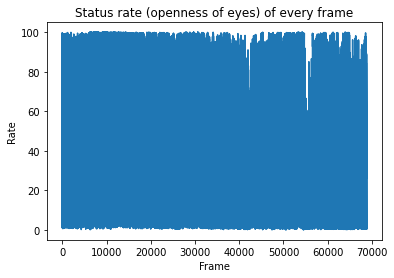

In [7]:
plt.title("Status rate (openness of eyes) of every frame")
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.plot(frames, status_rates)
plt.show()

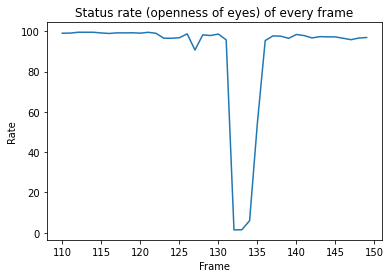

In [38]:
# look at the graph more in depth

# DONT change these parameters
frame_start = 0
frame_end = 2774  # normal sleep: last frame is 2804    restricted sleep: last frame is 2774 
frames = range(frame_start, frame_end + 1)

# CHANGE these parameter
frame_start = 110
frame_end = 150

plt.title("Status rate (openness of eyes) of every frame")
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.plot(frames[frame_start:frame_end], status_rates[frame_start:frame_end])
plt.show()

In [39]:
# Finds eye-blinks given a sequence of values and a treshhold.
def find_blinks(values, treshhold):
    blink = False
    blinks = []
    blink_count = 0
    for i, val in enumerate(values):
        if val < treshhold:
            if blink == False:
                blink_count +=1
                start = i
            blink = True
        else:
            if blink == True:
                end = i - 1
                #calculate duration of blink, and include in tuple
                duration = end - start + 1
                blinks.append((start, end, duration))
                #print("Blinking period: " + str(start) + " - " + str(end))
            blink = False
    return blinks, blink_count

treshhold = 15
blinks, count = find_blinks(status_rates, treshhold)
print(blinks)
print(np.array(blinks)[:,2])
print(len(blinks))

[(19, 21, 3), (132, 134, 3), (201, 204, 4), (317, 318, 2), (420, 420, 1), (488, 488, 1), (564, 566, 3), (582, 585, 4), (636, 638, 3), (670, 671, 2), (817, 820, 4), (856, 861, 6), (889, 894, 6), (998, 1000, 3), (1078, 1078, 1), (1089, 1091, 3), (1113, 1117, 5), (1146, 1164, 19), (1217, 1227, 11), (1272, 1275, 4), (1289, 1292, 4), (1353, 1366, 14), (1413, 1413, 1), (1427, 1431, 5), (1460, 1465, 6), (1483, 1495, 13), (1553, 1556, 4), (1580, 1583, 4), (1655, 1658, 4), (1701, 1704, 4), (1798, 1804, 7), (1846, 1850, 5), (1859, 1862, 4), (1883, 1889, 7), (1977, 1982, 6), (2038, 2040, 3), (2108, 2178, 71), (2441, 2453, 13), (2492, 2492, 1), (2526, 2554, 29), (2565, 2565, 1), (2574, 2584, 11), (2588, 2590, 3), (2606, 2622, 17), (2624, 2649, 26), (2651, 2665, 15), (2667, 2667, 1), (2676, 2676, 1), (2704, 2730, 27), (2778, 2783, 6), (2836, 2840, 5), (2872, 2876, 5), (2892, 2895, 4), (2917, 2941, 25), (2987, 2987, 1), (2989, 2989, 1), (3052, 3054, 3), (3056, 3057, 2), (3059, 3062, 4), (3064, 3065,

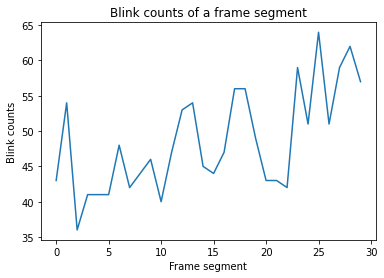

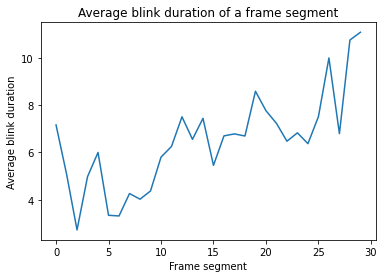

30
30


In [41]:
blink_starts = list(np.array(blinks)[:,0])
blink_durs = list(np.array(blinks)[:,2])

# Extracts features in a segment from given blinks
def blinks_segment(blink_starts, blink_durs, video_len, segment_len):
    # the amount of frames at the end that are not taken into account
    rest = video_len % segment_len
    num_frames = video_len - rest
    blink_counts = []
    average_durs = []
    
    blink_count = 0
    dur_count = 0
    
    # a blink is counted to a segment,when the blink starts in that segment
    for frame in range(num_frames):
        # only happens at the end of a segment
        if frame % segment_len == 0 and frame != 0:
            #print('new_segment', frame)
            blink_counts.append(blink_count)
            if dur_count > 0:
                avg_dur = dur_count / blink_count
            else:
                avg_dur = 0
            average_durs.append(avg_dur)
            blink_count = 0 
            dur_count = 0
        # happens when a blink starts
        if frame in blink_starts:
            frame_index = blink_starts.index(frame)
            blink_count += 1
            dur_count += blink_durs[frame_index]
            
    return blink_counts, average_durs
        
    
blink_counts, average_durs = blinks_segment(blink_starts, blink_durs, 83000, 2600)

# Plotting blink counts
plt.title("Blink counts of a frame segment")
plt.xlabel('Frame segment')
plt.ylabel('Blink counts')
plt.plot(range(len(blink_counts)), blink_counts)
plt.show()

# Plotting average blink durations
plt.title("Average blink duration of a frame segment")
plt.xlabel('Frame segment')
plt.ylabel('Average blink duration')
plt.plot(range(len(average_durs)), average_durs)
plt.show()

print(len(blink_counts))
print(len(average_durs))